In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('github_bot_processed_data.csv')


# 定义需要进行对数变换的列
num_cols = ['public_repos', 'public_gists', 'followers', 'following']

df['public_repos'] = pd.to_numeric(df['public_repos'], errors='coerce')
df['public_gists'] = pd.to_numeric(df['public_gists'], errors='coerce')
df['followers'] = pd.to_numeric(df['followers'], errors='coerce')
df['following'] = pd.to_numeric(df['following'], errors='coerce')

# 对这些列进行对数变换，同时添加新列到DataFrame
df['log_public_repos'] = np.log(df['public_repos'] + 1)  # 加1避免log(0)
df['log_public_gists'] = np.log(df['public_gists'] + 1)
df['log_followers'] = np.log(df['followers'] + 1)
df['log_following'] = np.log(df['following'] + 1)

# 移除原始列
df = df.drop(columns=num_cols)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   label             611 non-null    object 
 1   type              611 non-null    bool   
 2   site_admin        611 non-null    object 
 3   company           611 non-null    bool   
 4   blog              611 non-null    bool   
 5   location          611 non-null    bool   
 6   hireable          611 non-null    object 
 7   bio               311 non-null    object 
 8   created_at        611 non-null    object 
 9   updated_at        611 non-null    object 
 10  text_bot_count    611 non-null    int64  
 11  log_public_repos  610 non-null    float64
 12  log_public_gists  610 non-null    float64
 13  log_followers     610 non-null    float64
 14  log_following     610 non-null    float64
dtypes: bool(4), float64(4), int64(1), object(6)
memory usage: 55.0+ KB


### matplotlib

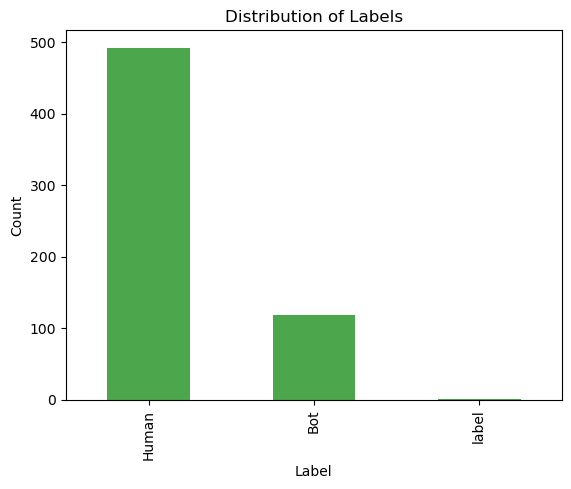

In [10]:

# 示例：绘制标签类别的计数条形图
label_counts = df['label'].value_counts()
label_counts.plot(kind='bar', color='green', alpha=0.7)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

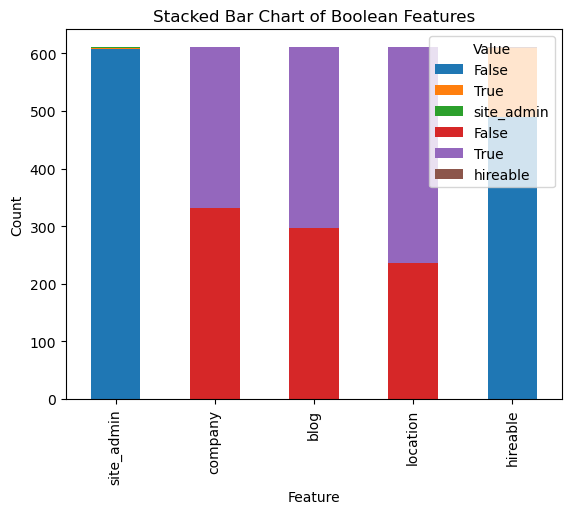

In [12]:
# 示例：绘制布尔特征的堆积柱状图
bool_features = ['site_admin', 'company', 'blog', 'location', 'hireable']

# 创建一个DataFrame，包含各布尔特征的取值计数
bool_counts = df[bool_features].apply(lambda x: x.value_counts())

# 绘制堆积柱状图
bool_counts.T.plot(kind='bar', stacked=True)
plt.xlabel('Feature')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Boolean Features')
plt.legend(title='Value', loc='upper right')
plt.show()

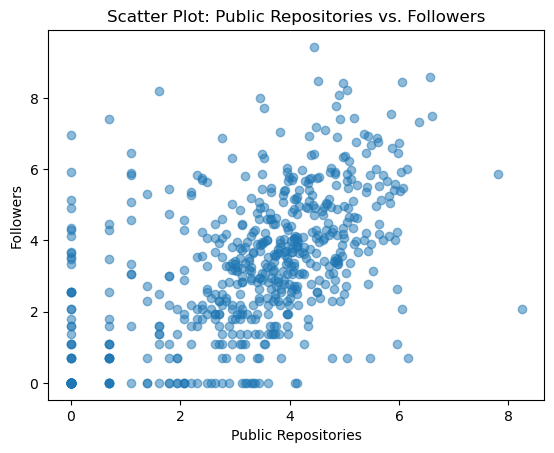

In [13]:
# 示例：绘制public_repos与followers之间的散点图
plt.scatter(df['log_public_repos'], df['log_followers'], alpha=0.5)
plt.xlabel('Public Repositories')
plt.ylabel('Followers')
plt.title('Scatter Plot: Public Repositories vs. Followers')
plt.show()

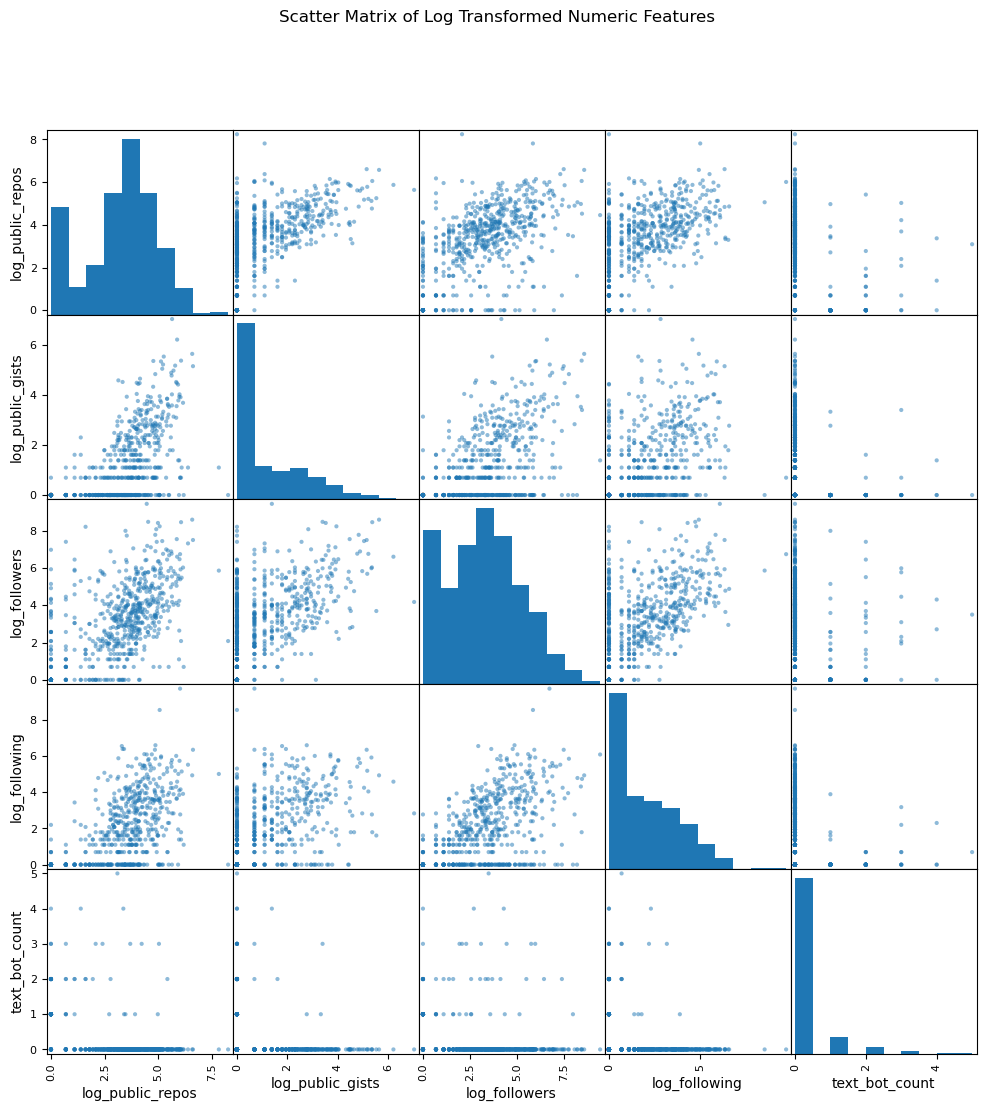

In [14]:
import pandas.plotting as pd_plotting

num_features = ['log_public_repos', 'log_public_gists', 'log_followers', 'log_following','text_bot_count']

# 绘制对数变换后的散点矩阵
pd_plotting.scatter_matrix(df[num_features], diagonal='hist', alpha=0.5, figsize=(12, 12))
plt.suptitle('Scatter Matrix of Log Transformed Numeric Features')
plt.show()

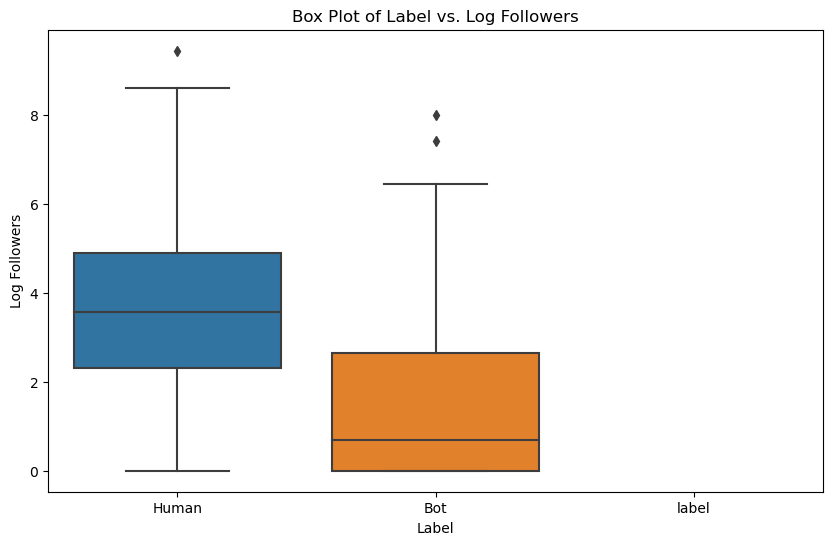

In [16]:
import seaborn as sns
# 箱线图：使用 sns.boxplot() 可视化各个特征相对于 label 的分布，帮助您了解不同类别之间的差异。 

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='log_followers')
plt.title('Box Plot of Label vs. Log Followers')
plt.xlabel('Label')
plt.ylabel('Log Followers')
plt.show()

D:\anaconda\res\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


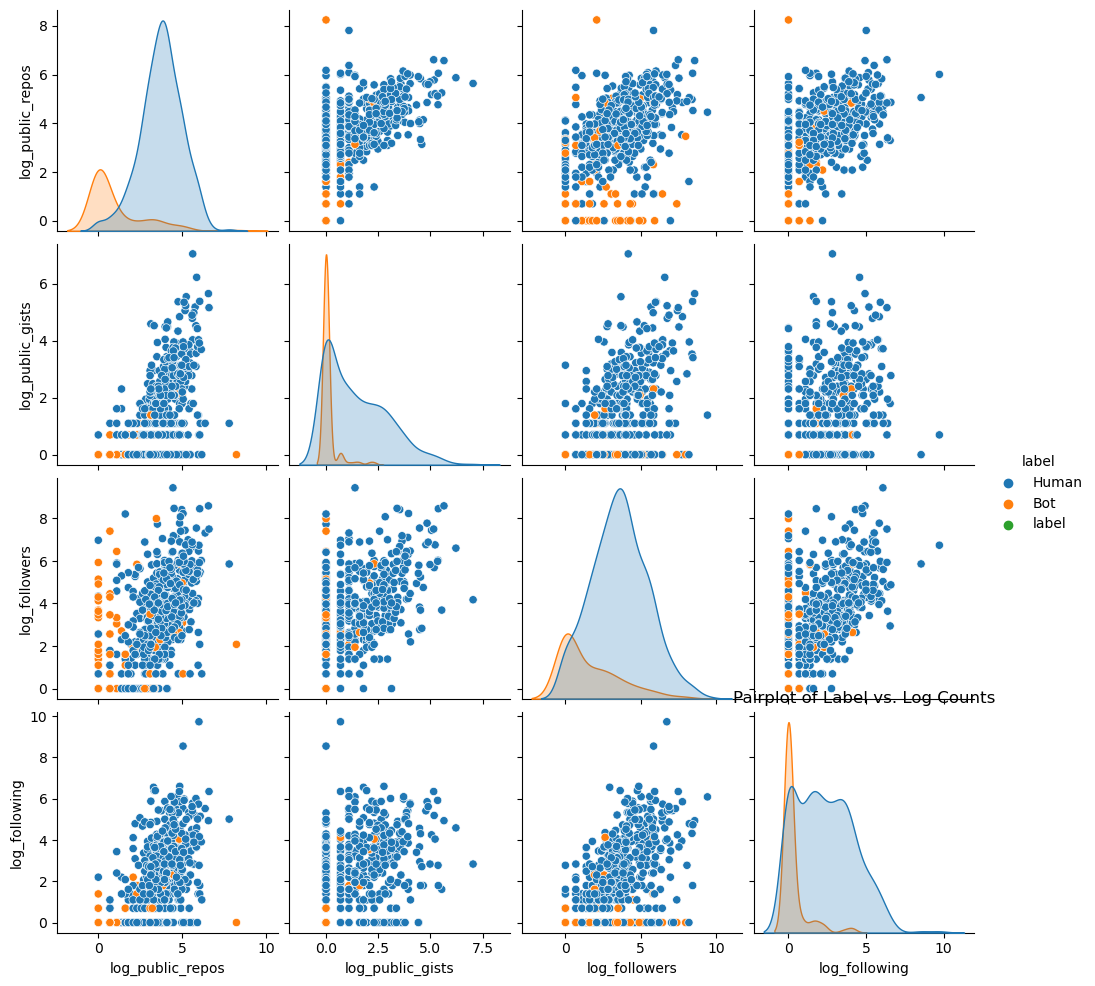

In [17]:
sns.pairplot(data=df, hue='label', vars=['log_public_repos', 'log_public_gists', 'log_followers', 'log_following'])
plt.title('Pairplot of Label vs. Log Counts')
plt.show()

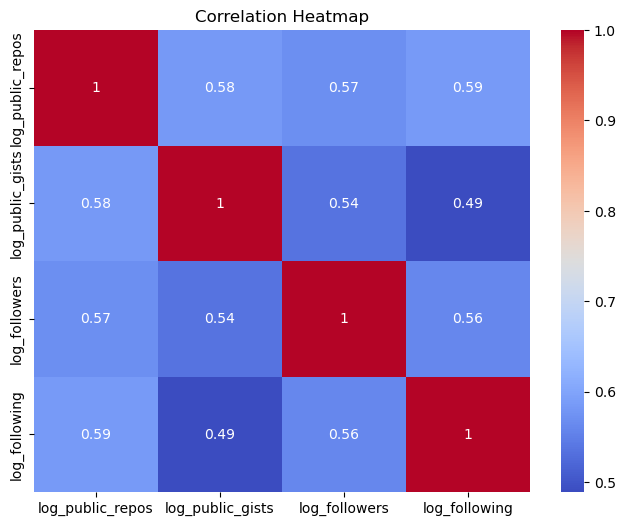

In [18]:
# 热图：使用 sns.heatmap() 可视化各个特征之间的相关性，帮助您了解特征之间的关联

correlation_matrix = df[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

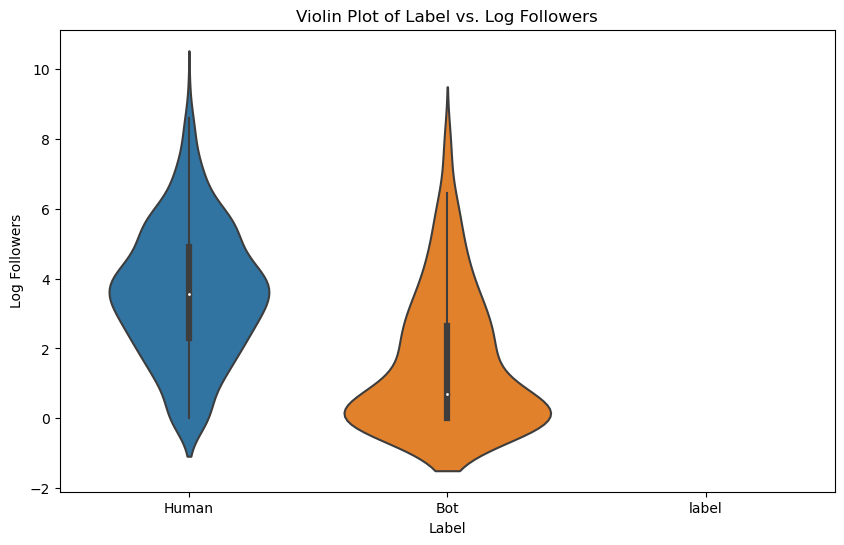

In [19]:
# 小提琴图：使用 sns.violinplot() 类似于箱线图，但提供了更多有关分布的信息。

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='label', y='log_followers')
plt.title('Violin Plot of Label vs. Log Followers')
plt.xlabel('Label')
plt.ylabel('Log Followers')
plt.show()